# Training CNN MNIST

## relevant imports

In [1]:
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist

import matplotlib.pyplot as plt

## Setup

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

## Datasets

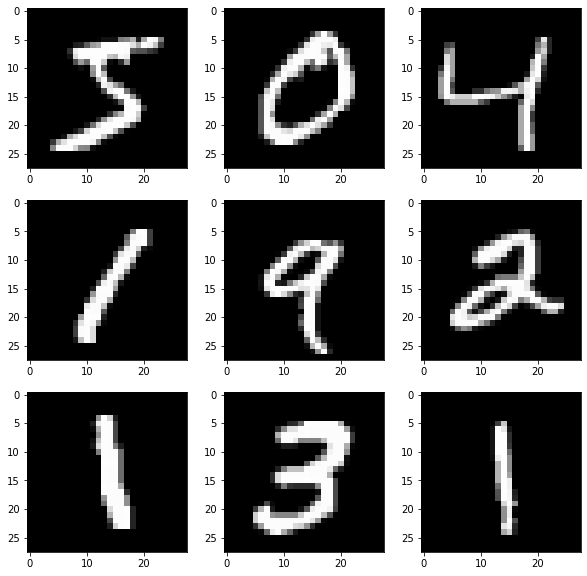

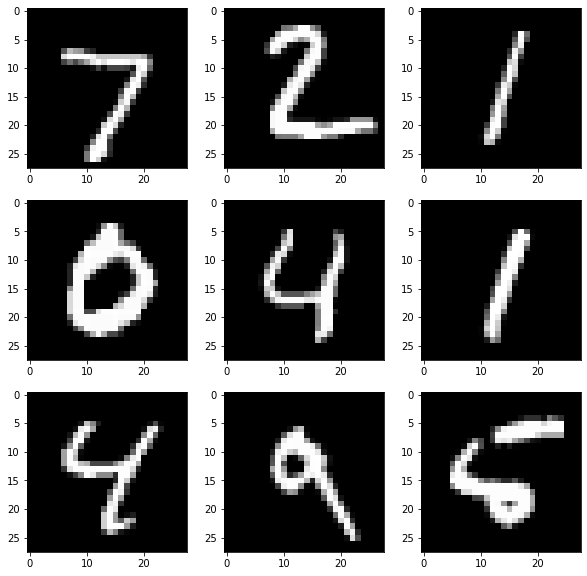

In [3]:

def draw_dataset_sample(dataset):
    plt.figure(figsize=(10, 10))
    for i in range(9):
        plt.subplot(330 + 1 + i)
        plt.imshow(dataset[i], cmap=plt.get_cmap('gray'))
    plt.show()

draw_dataset_sample(x_train)
draw_dataset_sample(x_test)

x_train, x_test = x_train / 255.0, x_test / 255.0


## defining model

In [4]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

## training

In [7]:

callbacks = [
    keras.callbacks.ModelCheckpoint("output_model/by_epoch/save_at_{epoch}.h5"),
]

history = model.fit(
    x_train,
    y_train,
    batch_size=64,
    epochs=5,
    validation_data=(x_test, y_test),
)

Epoch 1/5
938/938 [==============================] - 14s 15ms/step - loss: 0.1236 - accuracy: 0.9631 - val_loss: 0.0921 - val_accuracy: 0.9707
Epoch 2/5
938/938 [==============================] - 12s 13ms/step - loss: 0.1001 - accuracy: 0.9697 - val_loss: 0.0826 - val_accuracy: 0.9742
Epoch 3/5
938/938 [==============================] - 15s 16ms/step - loss: 0.0851 - accuracy: 0.9743 - val_loss: 0.0745 - val_accuracy: 0.9763
Epoch 4/5
938/938 [==============================] - 12s 12ms/step - loss: 0.0736 - accuracy: 0.9772 - val_loss: 0.0712 - val_accuracy: 0.9778
Epoch 5/5
938/938 [==============================] - 13s 14ms/step - loss: 0.0641 - accuracy: 0.9797 - val_loss: 0.0682 - val_accuracy: 0.9789


## Output training results

In [8]:
keras.utils.plot_model(model, to_file='output_model/model.png', show_shapes=True)

model.save("output_model/model.h5")

model.evaluate(x_test,  y_test, verbose=2)

313/313 - 1s - loss: 0.0682 - accuracy: 0.9789 - 615ms/epoch - 2ms/step


[0.06820356100797653, 0.9789000153541565]